In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["THEANO_FLAGS"] = "OMP_NUM_THREADS=1, MKL_NUM_THREADS=1, OPENBLAS_NUM_THREADS=1"
os.environ["OMP_NUM_THREADS"] =  "1"
os.environ["MKL_NUM_THREADS"] =  "1" 
os.environ["OPENBLAS_NUM_THREADS"] =  "1" 

In [3]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor

%matplotlib inline

/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.8/lib/python3.8/site-packages/theano/configdefaults.py:1952: UserWarning: Theano does not recognise this flag: OMP_NUM_THREADS
  warnings.warn('Theano does not recognise this flag: {0}'.format(key))
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.8/lib/python3.8/site-packages/theano/configdefaults.py:1952: UserWarning: Theano does not recognise this flag: MKL_NUM_THREADS
  warnings.warn('Theano does not recognise this flag: {0}'.format(key))
/Users/mrinank/Library/Caches/pypoetry/virtualenvs/epimodel-H-ywULmv-py3.8/lib/python3.8/site-packages/theano/configdefaults.py:1952: UserWarning: Theano does not recognise this flag: OPENBLAS_NUM_THREADS
  warnings.warn('Theano does not recognise this flag: {0}'.format(key))


setting environment variables properly now done.


In [4]:
dp = DataPreprocessor()
data = dp.preprocess_data("double_entry_alt_masks.csv", last_day="2020-05-30", schools_unis="single_features")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Travel Screen/Quarantine
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Travel Bans
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Public Transport Limited
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Internal Movement Limited
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Public Information Campaigns
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Symptomatic Testing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Georgia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
IN

In [6]:
import random

In [7]:
random.shuffle(data.Rs)

In [17]:
for i in range(7):
    print(data.Rs[(5*i):((5*i)+5)])

['FR', 'GR', 'NL', 'BA', 'LV']
['SE', 'DE', 'LT', 'IT', 'BG']
['FI', 'DK', 'CZ', 'RS', 'BE']
['NO', 'SK', 'IL', 'CH', 'ES']
['ZA', 'MX', 'MY', 'IE', 'GE']
['RO', 'PL', 'MA', 'HU', 'SI']
['NZ', 'SG', 'GB', 'HR', 'EE']


In [19]:
print(data.Rs[-6:])

['AL', 'AT', 'PT', 'AD', 'IS', 'MT']


In [5]:
cm_plot_style = [
#             ("\uf7f2", "tab:red"), # hospital symbol
            ("\uf963", "black"), # mask
            ("\uf0c0", "lightgrey"), # ppl
            ("\uf0c0", "grey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2
            ("\uf549", "black"), # school
            ("\uf19d", "black"), # university
            ("\uf965", "black"), # home
            ("\uf072", "grey"), # plane1
            ("\uf072", "black"), # plane2
            ("\uf238", "black"), # train
            ("\uf1b9", "black"), # car
            ("\uf641", "black") # flyer
        ]

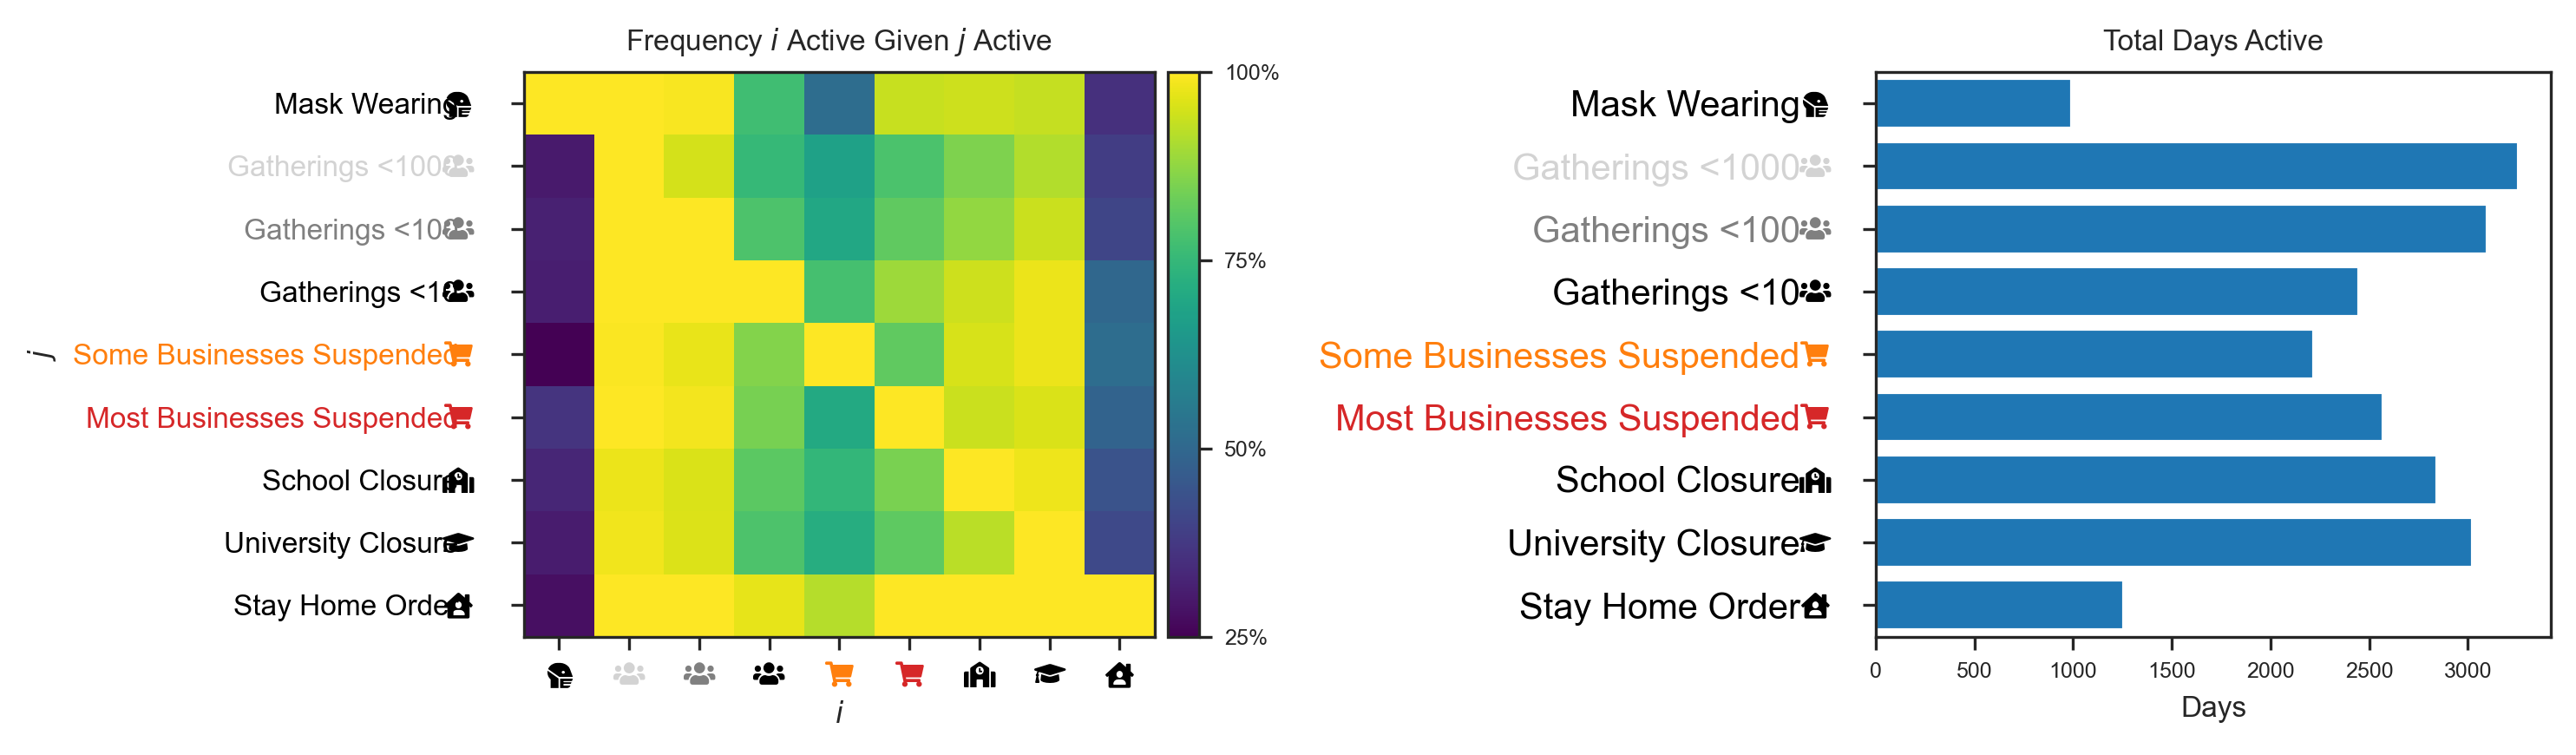

In [6]:
data.summary_plot(cm_plot_style)

In [7]:
data.mask_reopenings()

Masking AL from 2020-04-30 00:00:00+00:00
Masking AD from 2020-05-21 00:00:00+00:00
Masking AT from 2020-05-04 00:00:00+00:00
Masking AT from 2020-05-21 00:00:00+00:00
Masking BE from 2020-05-14 00:00:00+00:00
Masking BA from 2020-05-17 00:00:00+00:00
Masking BG from 2020-05-04 00:00:00+00:00
Masking BG from 2020-05-21 00:00:00+00:00
Masking HR from 2020-04-30 00:00:00+00:00
Masking HR from 2020-05-14 00:00:00+00:00
Masking HR from 2020-05-29 00:00:00+00:00
Masking CZ from 2020-04-27 00:00:00+00:00
Masking CZ from 2020-05-14 00:00:00+00:00
Masking CZ from 2020-05-28 00:00:00+00:00
Masking DK from 2020-04-23 00:00:00+00:00
Masking DK from 2020-05-14 00:00:00+00:00
Masking FI from 2020-05-17 00:00:00+00:00
Masking FR from 2020-05-14 00:00:00+00:00
Masking GE from 2020-05-26 00:00:00+00:00
Masking GE from 2020-05-27 00:00:00+00:00
Masking DE from 2020-04-23 00:00:00+00:00
Masking DE from 2020-05-07 00:00:00+00:00
Masking DE from 2020-05-09 00:00:00+00:00
Masking GR from 2020-05-07 00:00:0

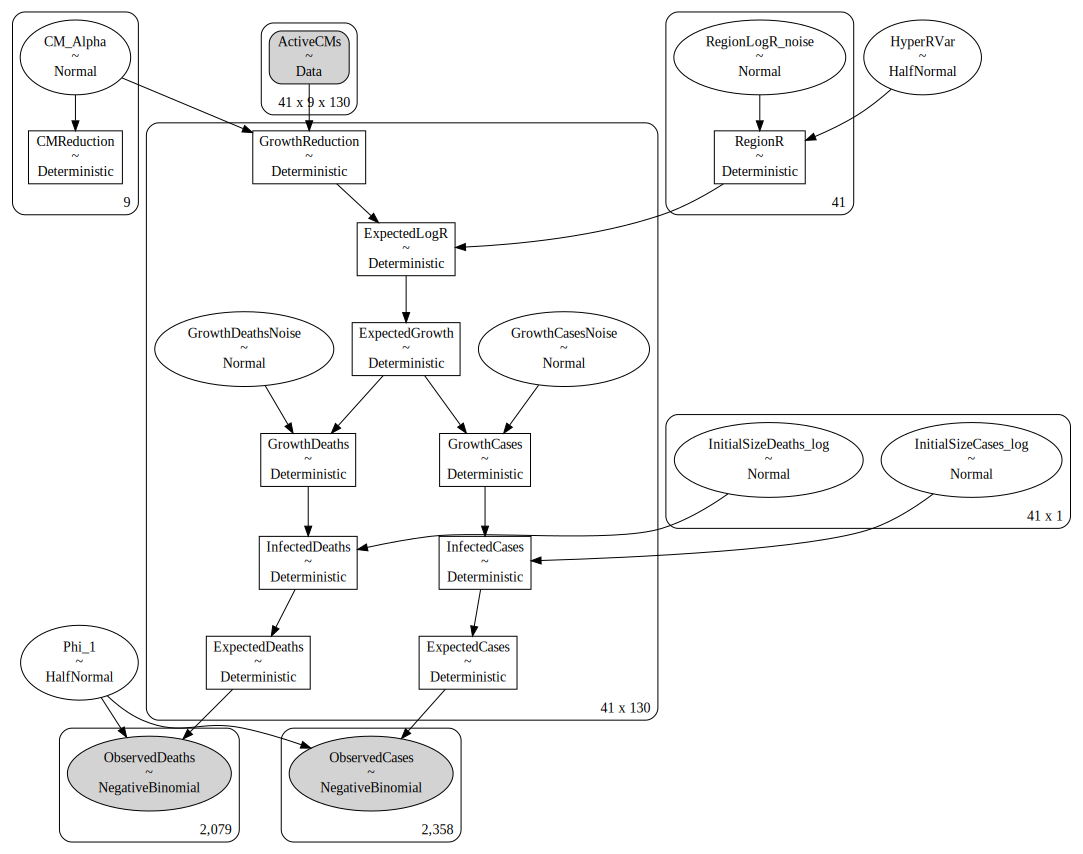

In [10]:
pm.model_to_graphviz(model2).render("model-combined-final")
pm.model_to_graphviz(model2)

In [8]:
with cm_effect.models.CMCombined_Final(data, cm_plot_style) as model2:
    model2.build_model()

In [9]:
with model2:
    model2.trace = pm.sample(2000, tune=500, cores=4, chains=4, max_treedepth=12)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [InitialSizeDeaths_log, Phi_1, InitialSizeCases_log, GrowthDeathsNoise, GrowthCasesNoise, RegionLogR_noise, HyperRVar, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, Phi_1, InitialSizeCases_log, GrowthDeathsNoise, GrowthCasesNoise, RegionLogR_noise, HyperRVar, CM_Alpha]


Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 13378 seconds.
INFO:pymc3:Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 13378 seconds.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


In [11]:
import pickle 

pickle.dump(model2.trace, open("alt_masks.pkl", "wb"))

In [ ]:
pm.model_to_graphviz(model2).render("model-combined-final")
pm.model_to_graphviz(model2)

In [19]:
np.mean(100*(1-model2.trace['CMReduction'][:, 0]))

0.7552881893780389

In [20]:
np.percentile(100*(1-model2.trace['CMReduction'][:, 0]), 2.5)

-15.480773524839782

In [ ]:
pickle.dump(model2.trace, open("final_full.pkl", "wb"))

INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/double-entry-data/out at 28-07;15-48
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/double-entry-data/out at 28-07;15-48


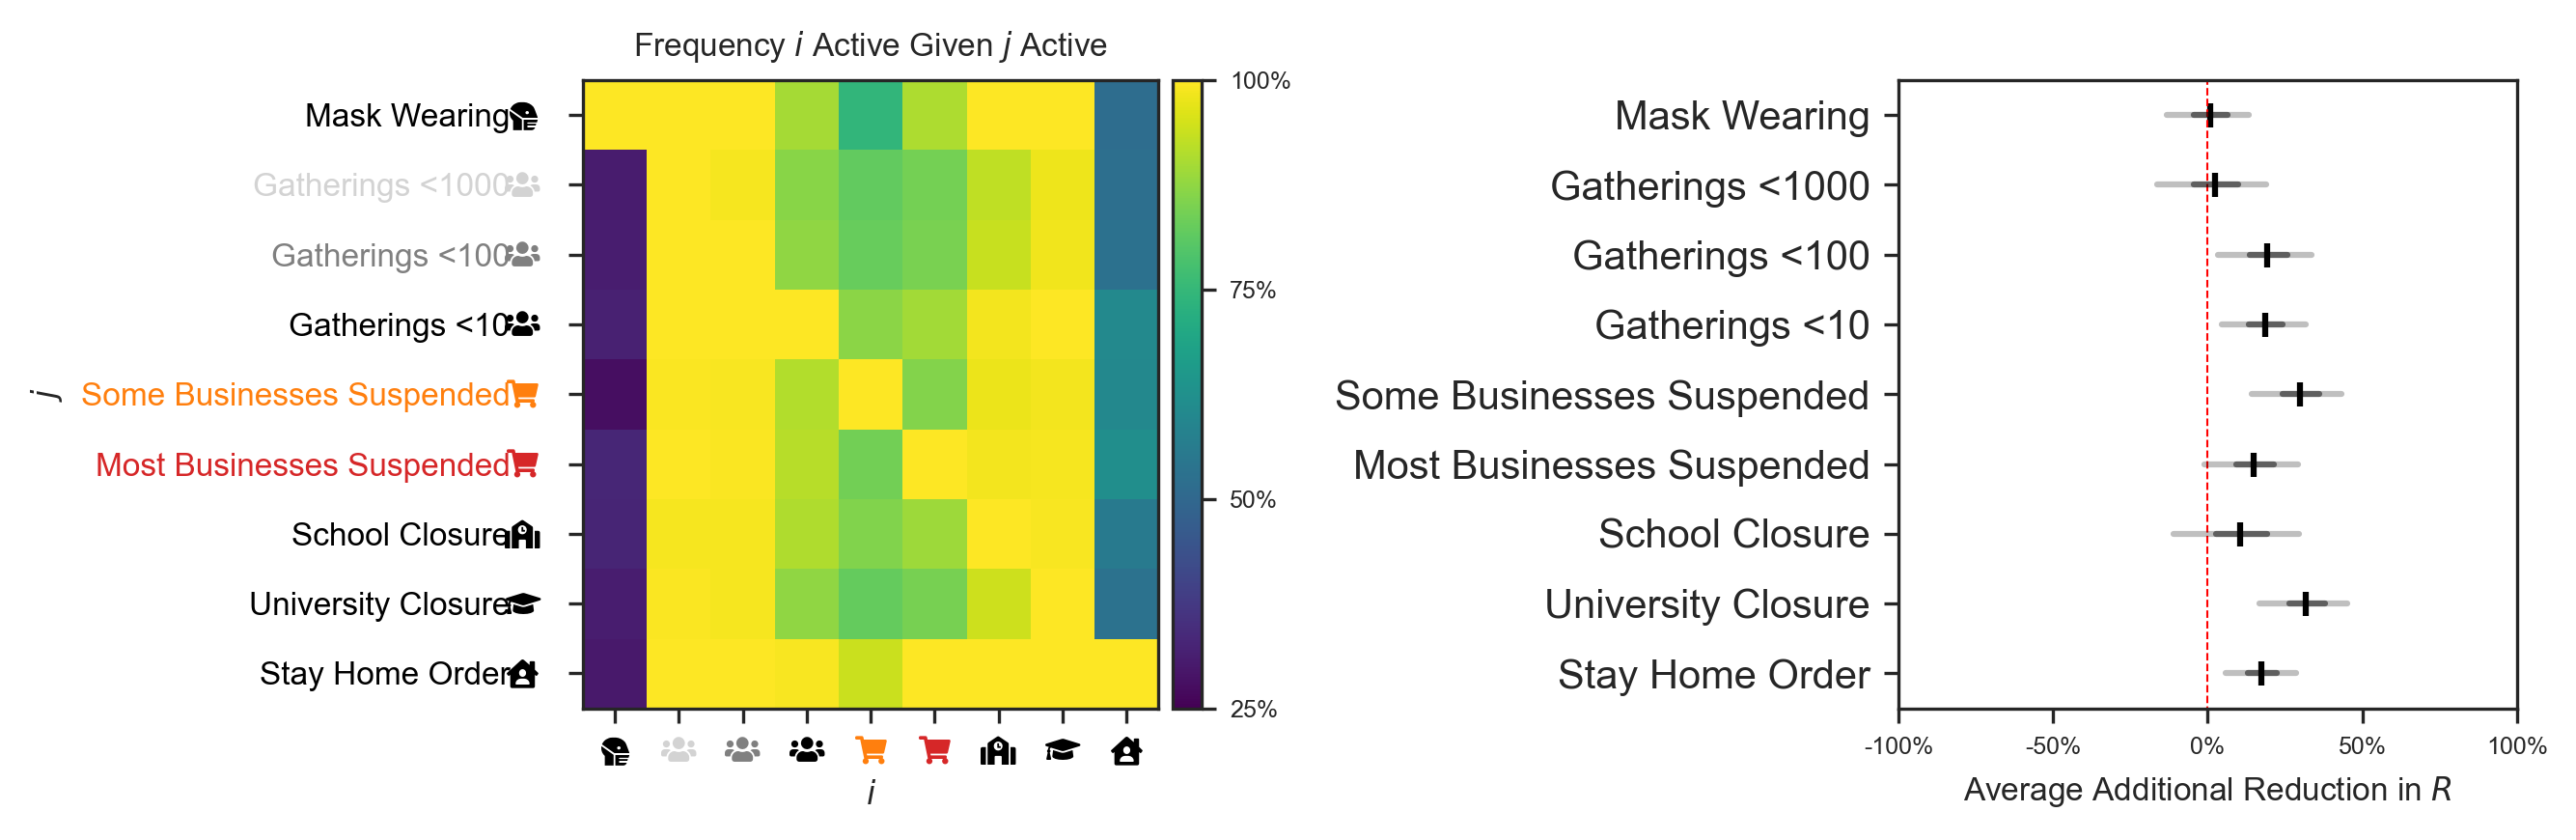

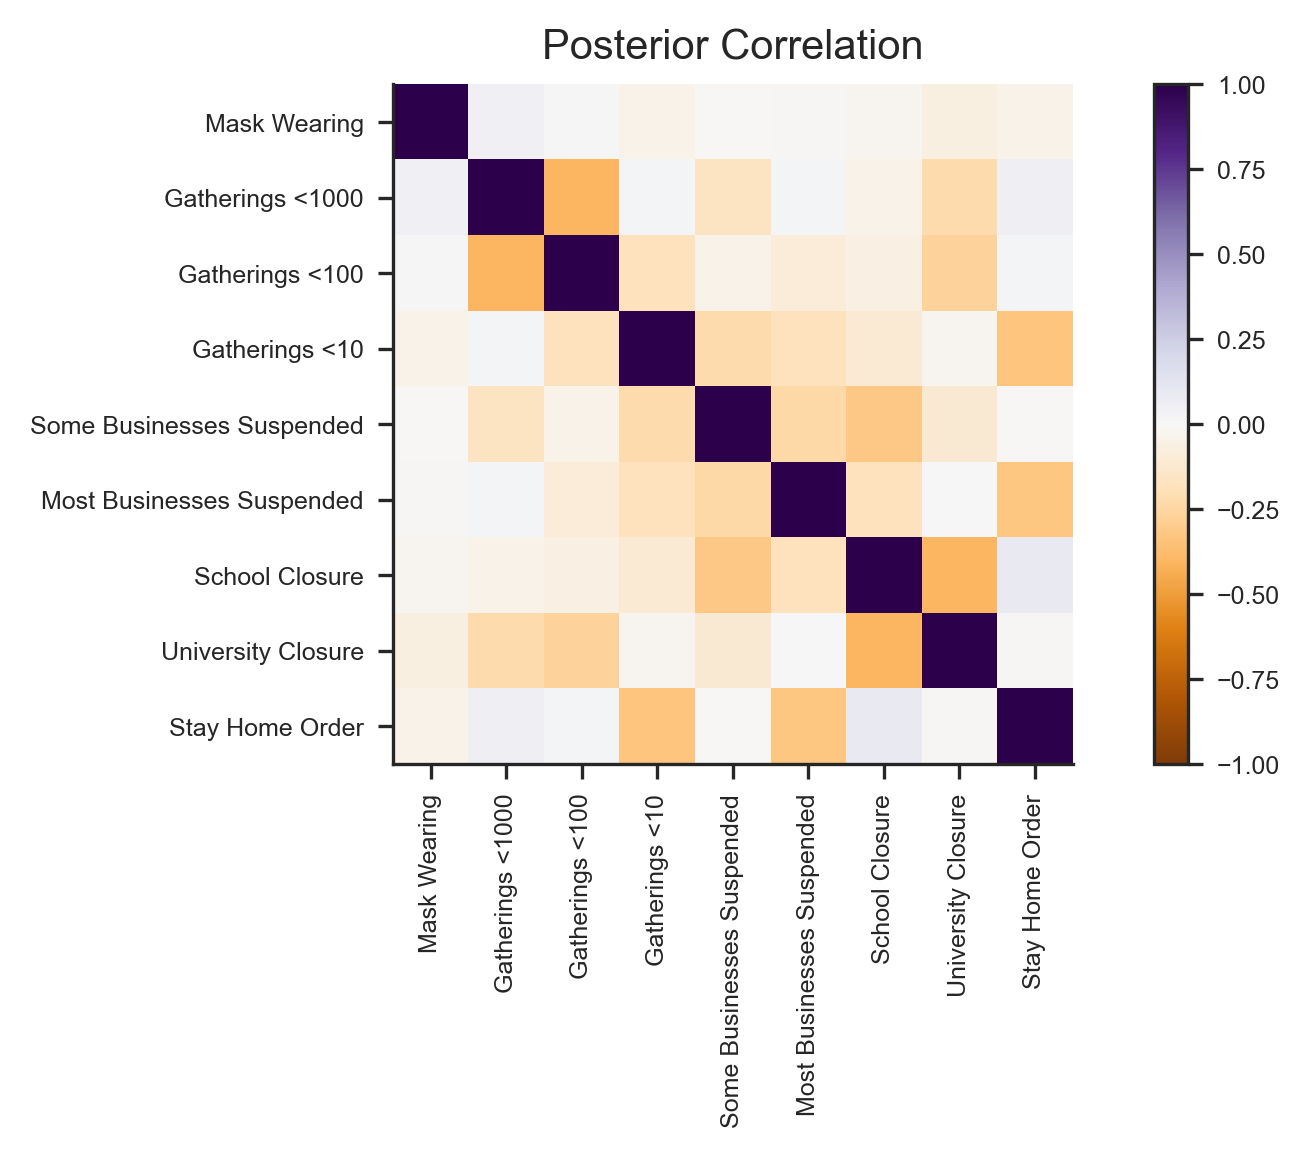

In [13]:
model2.plot_effect()

In [ ]:
model2.plot_effect()

In [ ]:
np.savetxt("default_res.txt", model2.trace.CMReduction)